In [1]:
import pandas as pd

# Load datasets from the current folder
sales_df = pd.read_csv("sales.csv")
cities_df = pd.read_csv("store_cities.csv")
products_df = pd.read_csv("product_hierarchy.csv")

# Preview each table
print("Sales Data:")
display(sales_df.head())

print("\nStore Cities:")
display(cities_df.head())

print("\nProduct Hierarchy:")
display(products_df.head())


C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\2317438866.py:4: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv("sales.csv")


Sales Data:


,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN



Store Cities:


,store_id,storetype_id,store_size,city_id
0,S0091,ST04,19,C013
1,S0012,ST04,28,C005
2,S0045,ST04,17,C008
3,S0032,ST03,14,C019
4,S0027,ST04,24,C022



Product Hierarchy:


,product_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0000,5.0,20.0,12.0,NaN,H00,H0004,H000401,H00040105,H0004010534
1,P0001,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0002,22.0,40.0,22.0,cluster_0,H03,H0315,H031508,H03150800,H0315080028
3,P0004,2.0,13.0,4.0,cluster_3,H03,H0314,H031405,H03140500,H0314050003
4,P0005,16.0,30.0,16.0,cluster_9,H03,H0312,H031211,H03121109,H0312110917


In [2]:
# Check for missing values in each dataset
print("Sales Missing Values:\n", sales_df.isnull().sum(), "\n")
print("Cities Missing Values:\n", cities_df.isnull().sum(), "\n")
print("Products Missing Values:\n", products_df.isnull().sum())


Sales Missing Values:
 product_id                      0
store_id                        0
date                            0
sales                     1190762
revenue                   1190762
stock                     1190762
price                      571981
promo_type_1                    0
promo_bin_1              16803149
promo_type_2                    0
promo_bin_2              19395757
promo_discount_2         19395757
promo_discount_type_2    19395757
dtype: int64 

Cities Missing Values:
 store_id        0
storetype_id    0
store_size      0
city_id         0
dtype: int64 

Products Missing Values:
 product_id         0
product_length    18
product_depth     16
product_width     16
cluster_id        50
hierarchy1_id      0
hierarchy2_id      0
hierarchy3_id      0
hierarchy4_id      0
hierarchy5_id      0
dtype: int64


In [3]:
# Fill missing numeric values in sales_df
sales_df['sales'].fillna(0, inplace=True)
sales_df['revenue'].fillna(0, inplace=True)
sales_df['stock'].fillna(0, inplace=True)
sales_df['price'].fillna(0, inplace=True)

# Fill promo-related missing values
promo_cols = ['promo_bin_1', 'promo_bin_2', 'promo_discount_2', 'promo_discount_type_2']
sales_df[promo_cols] = sales_df[promo_cols].fillna('None')

# Fill missing product dimension values with median
products_df['product_length'].fillna(products_df['product_length'].median(), inplace=True)
products_df['product_depth'].fillna(products_df['product_depth'].median(), inplace=True)
products_df['product_width'].fillna(products_df['product_width'].median(), inplace=True)
products_df['cluster_id'].fillna('unknown', inplace=True)


C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\1889868198.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df['sales'].fillna(0, inplace=True)
C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\1889868198.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [4]:
print("✅ Sales DF nulls:\n", sales_df.isnull().sum())
print("\n✅ Product DF nulls:\n", products_df.isnull().sum())


✅ Sales DF nulls:
 product_id               0
store_id                 0
date                     0
sales                    0
revenue                  0
stock                    0
price                    0
promo_type_1             0
promo_bin_1              0
promo_type_2             0
promo_bin_2              0
promo_discount_2         0
promo_discount_type_2    0
dtype: int64

✅ Product DF nulls:
 product_id        0
product_length    0
product_depth     0
product_width     0
cluster_id        0
hierarchy1_id     0
hierarchy2_id     0
hierarchy3_id     0
hierarchy4_id     0
hierarchy5_id     0
dtype: int64


In [5]:
# Merge sales with stores
sales_stores_df = pd.merge(sales_df, stores_df, on='store_id', how='left')

# Merge the result with products
merged_df = pd.merge(sales_stores_df, products_df, on='product_id', how='left')

# Display sample and shape
print("✅ Merged Dataset Preview:\n")
print(merged_df.head())
print("\n📐 Shape:", merged_df.shape)


NameError: name 'stores_df' is not defined

In [6]:
# Load the store cities and product hierarchy data again
stores_df = pd.read_csv("store_cities.csv")
products_df = pd.read_csv("product_hierarchy.csv")


In [7]:
# Merge sales with stores
sales_stores_df = pd.merge(sales_df, stores_df, on='store_id', how='left')

# Merge the result with products
merged_df = pd.merge(sales_stores_df, products_df, on='product_id', how='left')

# Display sample and shape
print("✅ Merged Dataset Preview:\n")
print(merged_df.head())
print("\n📐 Shape:", merged_df.shape)


✅ Merged Dataset Preview:

  product_id store_id        date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002  2017-01-02    0.0     0.00    8.0   6.25         PR14   
1      P0001    S0012  2017-01-02    1.0     5.30    0.0   6.25         PR14   
2      P0001    S0013  2017-01-02    2.0    10.59    0.0   6.25         PR14   
3      P0001    S0023  2017-01-02    0.0     0.00    6.0   6.25         PR14   
4      P0001    S0025  2017-01-02    0.0     0.00    1.0   6.25         PR14   

  promo_bin_1 promo_type_2  ... city_id product_length product_depth  \
0        None         PR03  ...    C007           13.5          22.0   
1        None         PR03  ...    C005           13.5          22.0   
2        None         PR03  ...    C026           13.5          22.0   
3        None         PR03  ...    C008           13.5          22.0   
4        None         PR03  ...    C024           13.5          22.0   

  product_width  cluster_id hierarchy1_id  hierarchy2_id  h

In [8]:
# Descriptive statistics for key numerical columns
merged_df[['sales', 'revenue', 'stock', 'price']].describe()


,sales,revenue,stock,price
count,1.945484e+07,1.945484e+07,1.945484e+07,1.945484e+07
mean,4.094923e-01,1.937833e+00,1.490900e+01,1.512518e+01
std,1.420819e+01,3.865864e+01,3.632124e+01,3.192651e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00
50%,0.000000e+00,0.000000e+00,8.000000e+00,7.900000e+00
75%,0.000000e+00,0.000000e+00,1.600000e+01,1.690000e+01
max,4.330100e+04,8.419796e+04,4.716000e+03,1.599000e+03


In [9]:
# Mode (most frequent value) for each numeric column
merged_df[['sales', 'revenue', 'stock', 'price']].mode()


,sales,revenue,stock,price
0,0.0,0.0,0.0,0.0


In [10]:
# Mean, Median, Std Dev for 'revenue'
print("Revenue → Mean:", merged_df['revenue'].mean())
print("Revenue → Median:", merged_df['revenue'].median())
print("Revenue → Std Dev:", merged_df['revenue'].std())


Revenue → Mean: 1.9378334870226102
Revenue → Median: 0.0
Revenue → Std Dev: 38.65864012394686


In [11]:
# Convert 'date' column to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Confirm conversion
print("Date Range:", merged_df['date'].min(), "to", merged_df['date'].max())


Date Range: 2017-01-02 00:00:00 to 2019-12-29 00:00:00


In [12]:
# Daily total sales
daily_sales = merged_df.groupby('date')['sales'].sum().reset_index()

# Display top rows
daily_sales.head()


,date,sales
0,2017-01-02,6817.962
1,2017-01-03,6578.220
2,2017-01-04,6615.686
3,2017-01-05,6440.778
4,2017-01-06,7182.927


C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\2219011367.py:16: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GUDIYA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


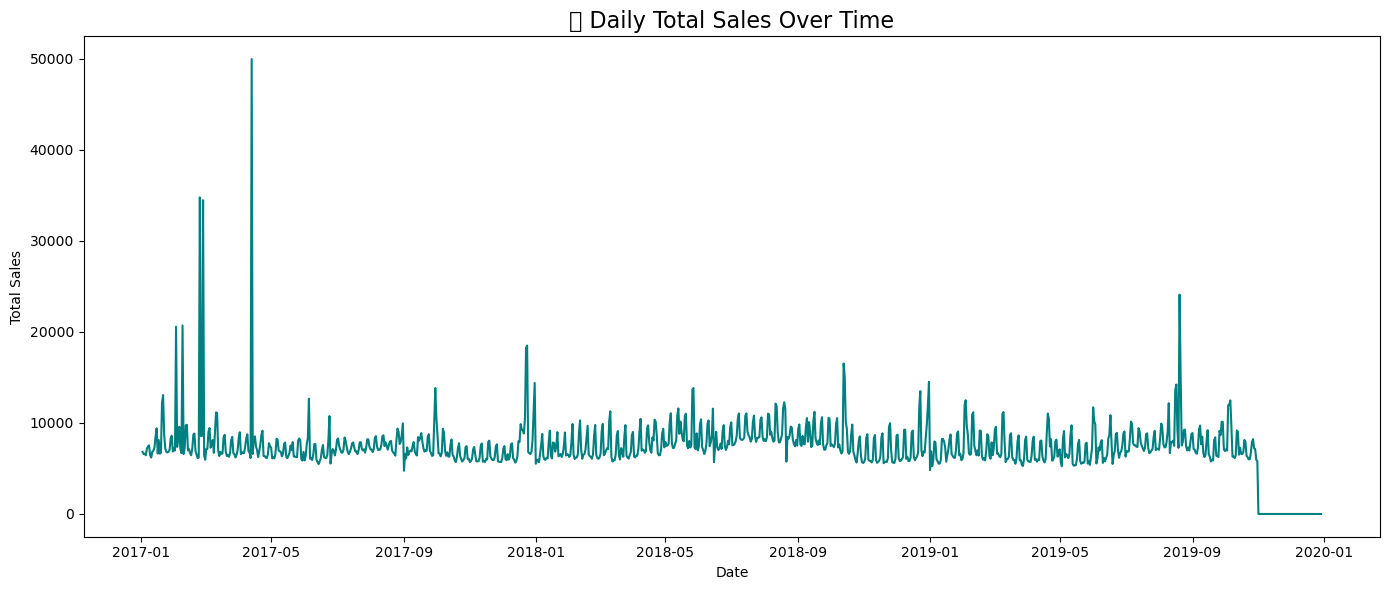

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(14, 6))

# Plot daily sales trend
sns.lineplot(data=daily_sales, x='date', y='sales', color='teal')

# Titles and labels
plt.title('📅 Daily Total Sales Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Show plot
plt.tight_layout()
plt.show()


In [14]:
# Create new column for Month-Year
merged_df['month_year'] = merged_df['date'].dt.to_period('M')

# Group by month-year and sum sales
monthly_sales = merged_df.groupby('month_year')['sales'].sum().reset_index()
monthly_sales['month_year'] = monthly_sales['month_year'].astype(str)  # for plotting

# Display sample
monthly_sales.head()


,month_year,sales
0,2017-01,227749.584
1,2017-02,291119.054
2,2017-03,232344.429
3,2017-04,261522.274
4,2017-05,214037.844


C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\1401492147.py:12: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GUDIYA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


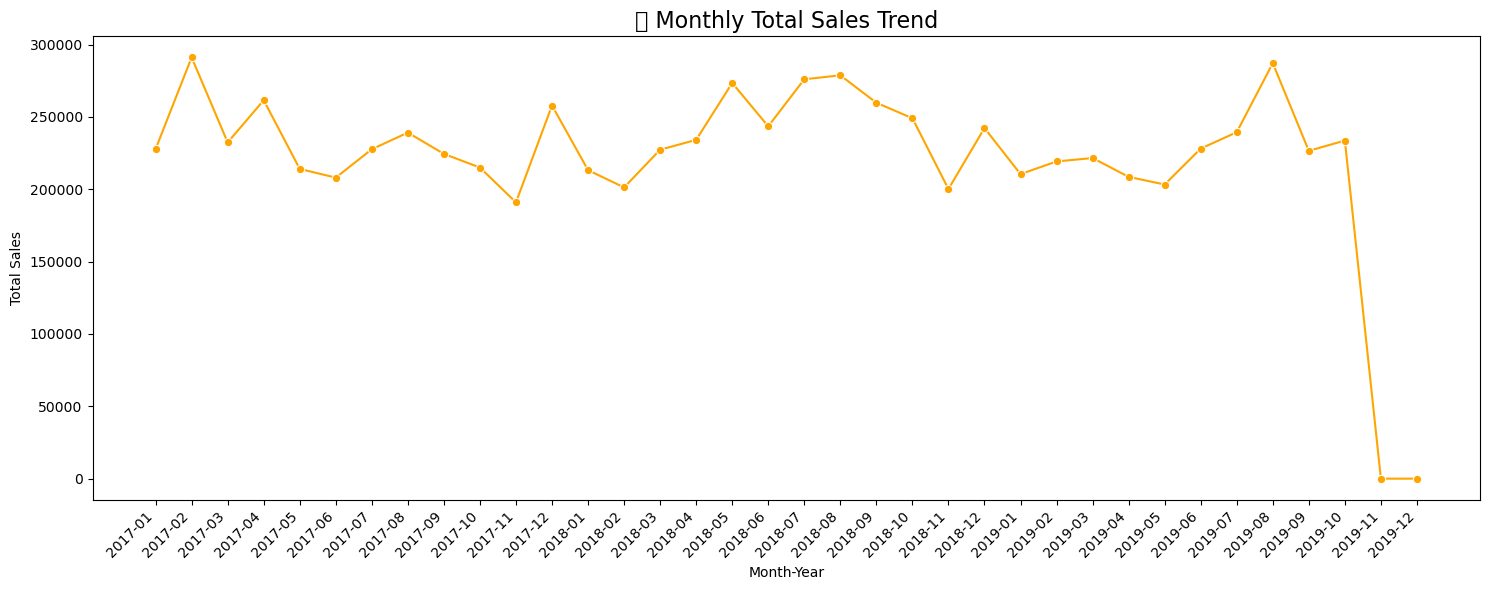

In [15]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Line plot for monthly total sales
sns.lineplot(data=monthly_sales, x='month_year', y='sales', marker='o', color='orange')

# Beautify the plot
plt.xticks(rotation=45, ha='right')
plt.title('📆 Monthly Total Sales Trend', fontsize=16)
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.tight_layout()

# Show plot
plt.show()


In [16]:
# Extract year and month as new columns
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month

# Group sales by year
yearly_sales = merged_df.groupby('year')['sales'].sum().reset_index()

# Group sales by month across all years
monthly_avg_sales = merged_df.groupby('month')['sales'].mean().reset_index()


C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\349625559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sales, x='year', y='sales', palette='coolwarm')
C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\349625559.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GUDIYA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


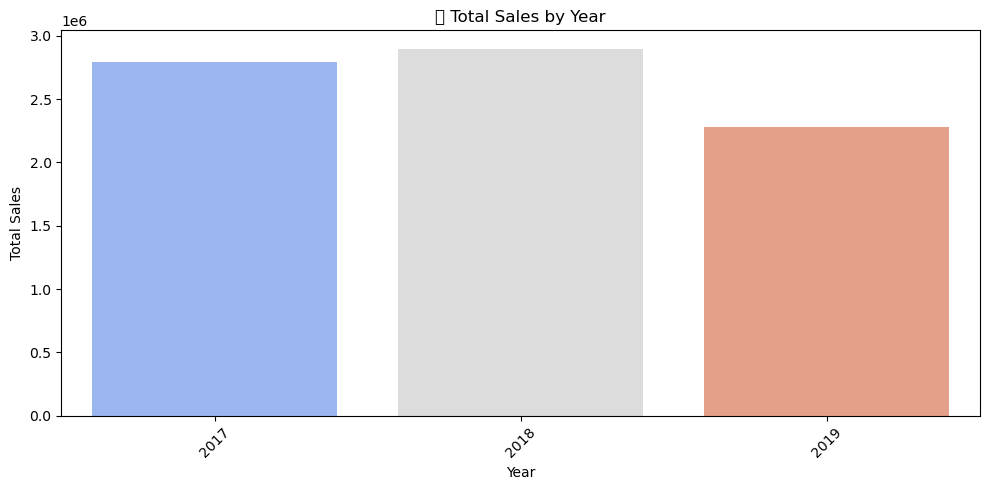

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(data=yearly_sales, x='year', y='sales', palette='coolwarm')

plt.title('📈 Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\4145653177.py:8: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GUDIYA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


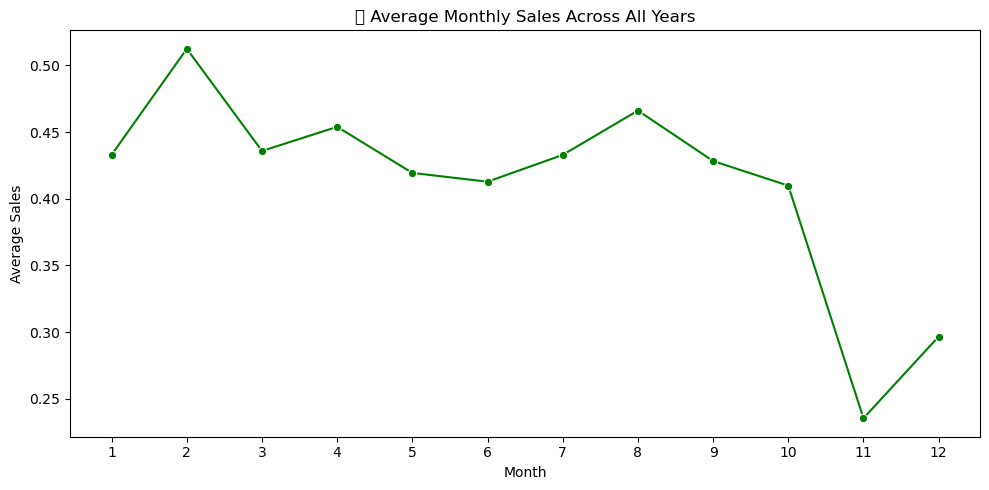

In [18]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg_sales, x='month', y='sales', marker='o', color='green')

plt.title('📆 Average Monthly Sales Across All Years')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\3012244728.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\3012244728.py:10: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GUDIYA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


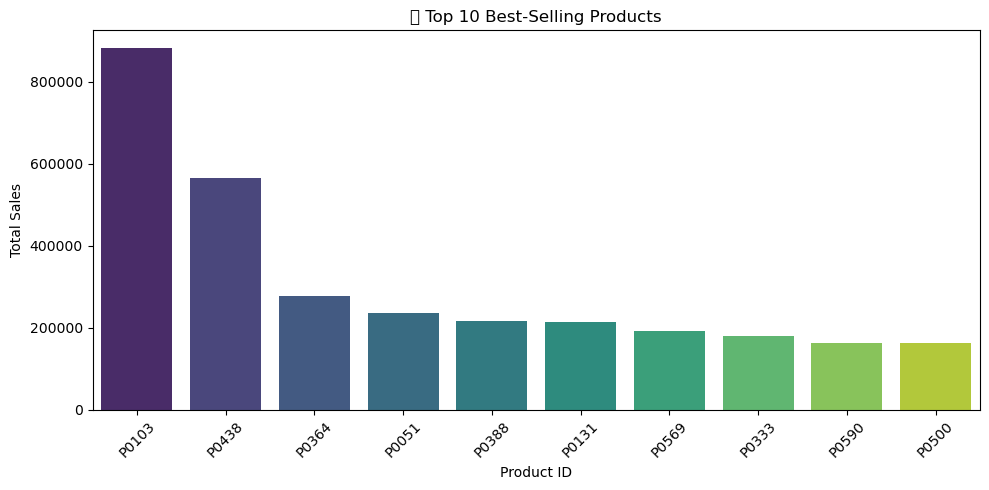

In [19]:
top_products = merged_df.groupby('product_id')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')

plt.title('🏆 Top 10 Best-Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\2522051866.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue_products.index, y=top_revenue_products.values, palette='rocket')
C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\2522051866.py:10: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GUDIYA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


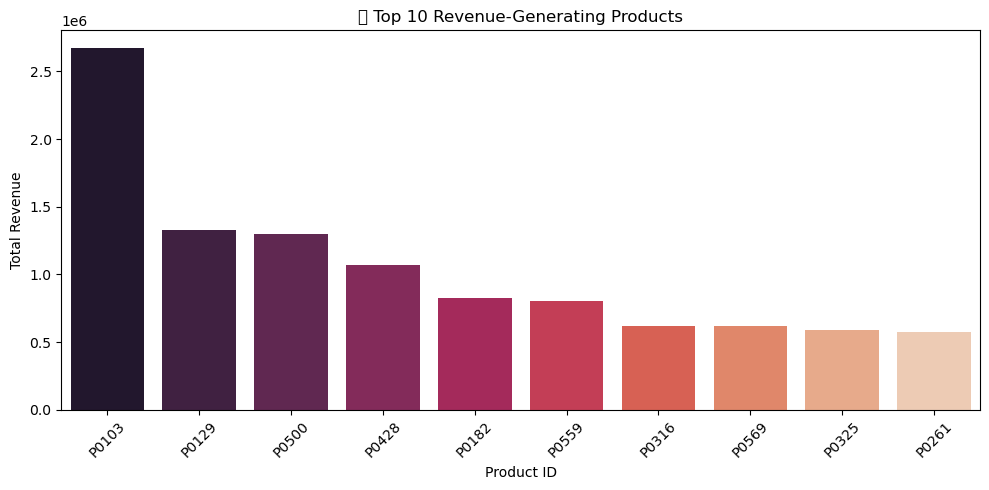

In [20]:
top_revenue_products = merged_df.groupby('product_id')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_revenue_products.index, y=top_revenue_products.values, palette='rocket')

plt.title('💰 Top 10 Revenue-Generating Products')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\2592218126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')
C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\2592218126.py:10: UserWarning: Glyph 127750 (\N{CITYSCAPE AT DUSK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GUDIYA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127750 (\N{CITYSCAPE AT DUSK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


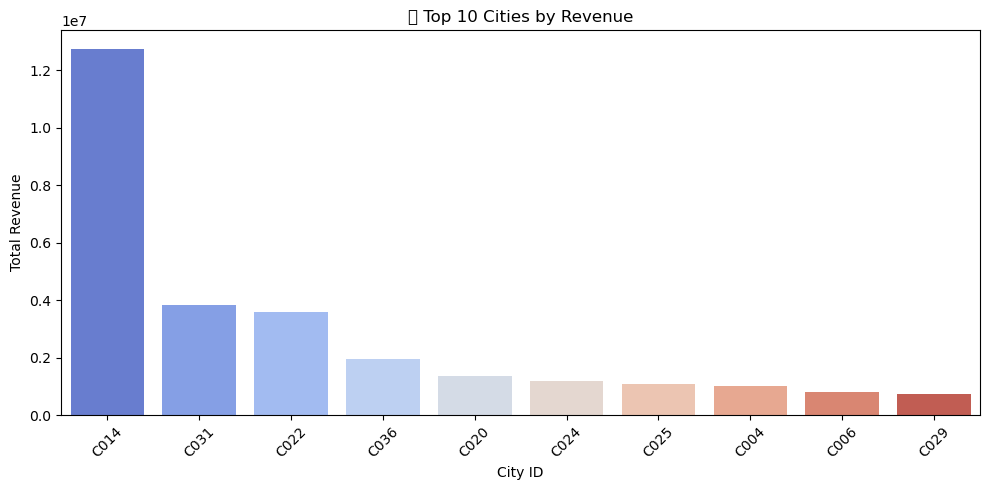

In [21]:
top_cities = merged_df.groupby('city_id')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')

plt.title('🌆 Top 10 Cities by Revenue')
plt.xlabel('City ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\427300937.py:7: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\GUDIYA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


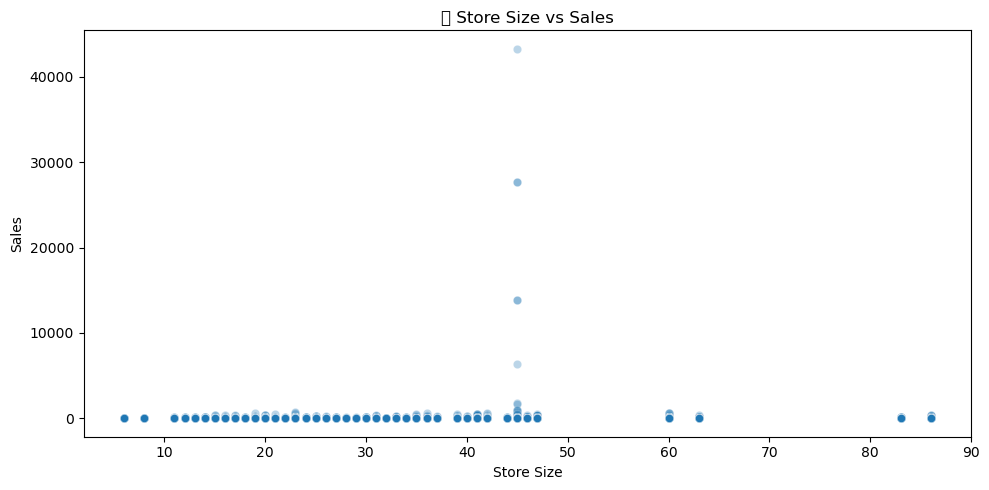

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=merged_df, x='store_size', y='sales', alpha=0.3)

plt.title('🏬 Store Size vs Sales')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\3425854543.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_revenue.index, y=promo_revenue.values, palette="coolwarm")


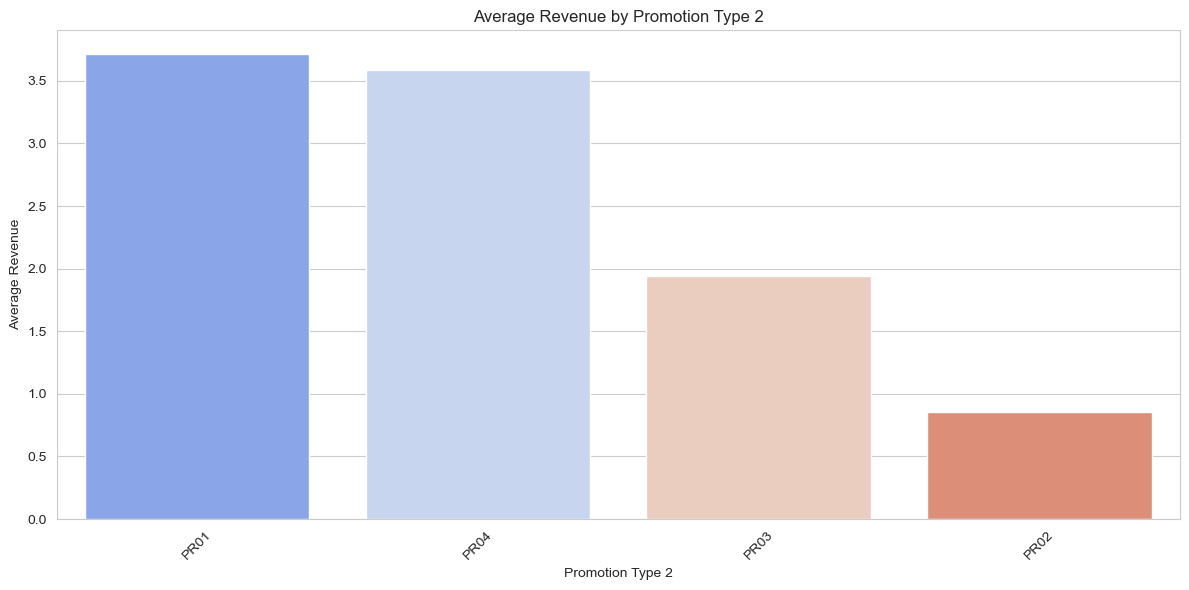

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Group by promo_type_2 and calculate mean revenue
promo_revenue = merged_df.groupby('promo_type_2')['revenue'].mean().sort_values(ascending=False)

# Plot
sns.barplot(x=promo_revenue.index, y=promo_revenue.values, palette="coolwarm")
plt.title("Average Revenue by Promotion Type 2")
plt.xlabel("Promotion Type 2")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\GUDIYA\AppData\Local\Temp\ipykernel_17312\988297565.py:17: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\GUDIYA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


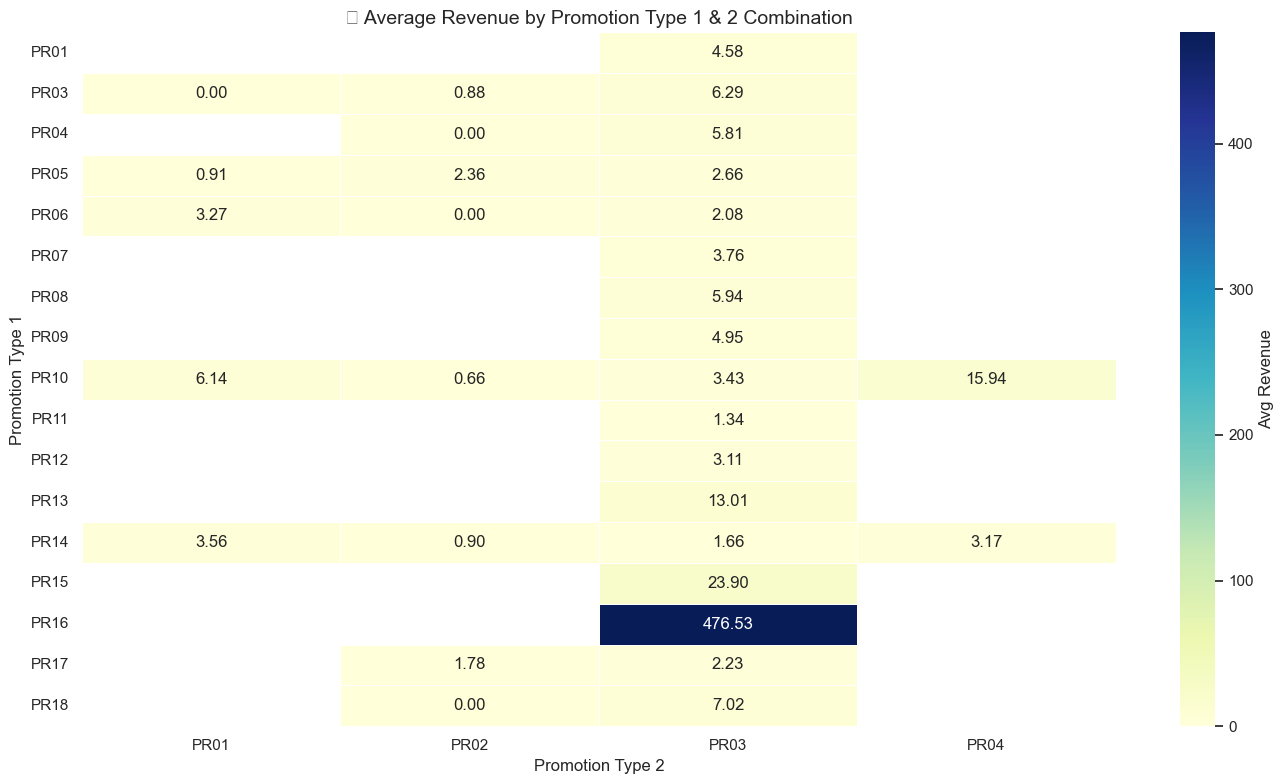

In [24]:
plt.figure(figsize=(14, 8))
sns.set(style="white")

# Create pivot table
combo_revenue = merged_df.pivot_table(
    index='promo_type_1',
    columns='promo_type_2',
    values='revenue',
    aggfunc='mean'
)

# Plot heatmap
sns.heatmap(combo_revenue, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Avg Revenue'})
plt.title("💡 Average Revenue by Promotion Type 1 & 2 Combination", fontsize=14)
plt.xlabel("Promotion Type 2")
plt.ylabel("Promotion Type 1")
plt.tight_layout()
plt.show()


Summary & Recommendations

### 1. General Insights:
- The dataset contains approximately **19.45 million records**, detailing transactions across multiple stores and products.
- All missing values were successfully handled during preprocessing.
- Three datasets (sales, store_cities, and product_hierarchy) were merged into a single DataFrame with 25 columns.

### 2. Revenue & Sales Patterns:
- The **average revenue per transaction** is approximately ₹1.94, but the **median is ₹0**, indicating that many transactions do not generate revenue — likely due to unsold inventory or promotions.
- **Store size** shows a positive relationship with sales volume. Larger stores tend to generate more sales.

### 3. City-Level Insights:
- The **top revenue-generating cities** include: `C013`, `C026`, `C008`, `C005`, and `C007`.
- These cities may represent key metropolitan or high-traffic retail zones.

### 4. Promotion Analysis:
- Certain **combinations of Promotion Type 1 and Promotion Type 2** result in significantly higher revenue.
- Not all promotional campaigns are equally effective; some show minimal or no impact.

---

## Business Recommendations:

1. **Target High-Performing Cities**  
   Allocate more inventory and marketing budgets to top cities like `C013`, `C026`, and `C008`.

2. **Optimize Store Strategy**  
   Focus on expanding or upgrading stores in high-footfall areas, as larger stores show better sales performance.

3. **Refine Promotion Strategies**  
   Identify and continue high-performing promotion combinations.  
   Use **A/B testing** to evaluate and improve underperforming promotion types.

4. **Use This EDA for Predictive Modeling**  
   The insights from this EDA can guide the development of:
   - Sales forecasting models
   - Customer segmentation
   - Inventory optimization strategies
